In [83]:
import mediapipe as mp
import cv2
import numpy as np 
import uuid
import os


keys=[["Q","W","E","R","T","Y","U","I","O","P"],
      ["A","S","D","F","G","H","J","K","L",";"],
      ["Z","X","C","V","B","N","M",",",".","/"]]


mp_drawing=mp.solutions.drawing_utils
mp_hands=mp.solutions.hands

cap=cv2.VideoCapture(1)

with mp_hands.Hands(min_detection_confidence=0.6,min_tracking_confidence=0.5) as hands:

	while cap.isOpened():
		ret,frame=cap.read()

		image=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
		# Flip on horizontal
		#image = cv2.flip(image, 1)
		image.flags.writeable=False# Set flag as false
		results=hands.process(image)
		image.flags.writeable=True# Set flag as true
		image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

		#Detections
		#print(results)
		#print(results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP])
	
		#Rendering results
		if results.multi_hand_landmarks:
			for num,hand in enumerate(results.multi_hand_landmarks):
				mp_drawing.draw_landmarks(image,hand,mp_hands.HAND_CONNECTIONS)


		cv2.imshow('Hand Tracking',image)

		if cv2.waitKey(10) & 0xFF==ord('q'):
			break
cap.release()
cv2.destroyAllWindows()

In [84]:
print(results.multi_hand_landmarks)

[landmark {
  x: 0.5913301110267639
  y: 0.6344860196113586
  z: -4.031146818306297e-05
}
landmark {
  x: 0.647310733795166
  y: 0.5528578758239746
  z: -0.03793040290474892
}
landmark {
  x: 0.6845124363899231
  y: 0.4716525971889496
  z: -0.06974153220653534
}
landmark {
  x: 0.7064465284347534
  y: 0.3912774920463562
  z: -0.09257128834724426
}
landmark {
  x: 0.7263778448104858
  y: 0.33049440383911133
  z: -0.11686008423566818
}
landmark {
  x: 0.5844599604606628
  y: 0.4133698642253876
  z: -0.10308536887168884
}
landmark {
  x: 0.5727095007896423
  y: 0.3018187880516052
  z: -0.14039131999015808
}
landmark {
  x: 0.566482663154602
  y: 0.23639658093452454
  z: -0.15616855025291443
}
landmark {
  x: 0.5618734955787659
  y: 0.17837423086166382
  z: -0.16561482846736908
}
landmark {
  x: 0.5373924970626831
  y: 0.4288190007209778
  z: -0.09780962020158768
}
landmark {
  x: 0.5135493874549866
  y: 0.3120768070220947
  z: -0.14703361690044403
}
landmark {
  x: 0.500710129737854
  y: 

In [85]:
print(results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP])

x: 0.5618734955787659
y: 0.17837423086166382
z: -0.16561482846736908



In [86]:
results.multi_handedness[0].classification[0].index==num

True

In [87]:
def get_label(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [88]:
a,b=get_label(num,hand,results)

In [89]:
a

'0 0.94'

In [90]:
b

(359, 85)

In [91]:
b[0]

359

In [92]:
str(b[1])

'85'

In [93]:
from time import sleep
def findDistance():
    p1x=results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.THUMB_TIP].x
    p1y=results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.THUMB_TIP].y
    p2x=results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x
    p2y=results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y
    distancey=math.sqrt(((p1x-p2x)**2)+((p1y-p2y)**2))
    return distancey

In [94]:
#BIG ONE
xi=[175,217,262,307,353,402,446,493,540,590,174,218,263,310,356,403,443,495,545,590,176,220,261,309,356,403,457,496,545,590,177,255,310,367,410,430,590]
yi=[62,58,57,56,57,52,55,55,55,55,121,118,117,123,115,119,115,119,119,119,182,181,176,175,178,177,178,178,178,178,250,250,250,250,250,250,248]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [95]:
#SMALL ONE
xi=[219,250,293,327,365,407,445,486,526,557,217,254,290,330,368,405,443,480,525,566,215,255,295,332,370,404,447,490,522,567,214,250,304,355,386,436,556]
yi=[60,57,56,50,55,50,45,48,45,42,110,106,104,104,104,105,97,94,95,97,160,159,155,151,153,148,151,152,152,150,211,212,212,210,210,206,206]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [96]:
len(yi)

37

In [97]:
import math
mini=10000
mindex=0
def find_dis(x,y):
    mini=10000
    for i in range(len(dist)):
        dist[i]=math.sqrt(((x-xi[i])**2)+((y-yi[i])**2))
        if dist[i]<mini:
            mini=dist[i]
            mindex=i
    return mindex

In [98]:
print(results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.THUMB_TIP].x)
#print(results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x)

0.7263778448104858


In [99]:
ds=results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.THUMB_TIP].x

In [100]:
ds

0.7263778448104858

In [101]:
print(results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y)

0.3018187880516052


In [102]:
cap = cv2.VideoCapture(1)
stri=""
with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.7,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,'('+str(coord[0])+', '+str(coord[1])+')',(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    #cv2.putText(image,'('+str(coord[0])+', '+str(coord[1])+')'+'='+ltr[mindex],(10, 50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    l=findDistance()#Method to find dist b/w pt. 8 and 12 in frame img
                    #"""
                    if l<0.07:
                        if ltr[mindex]=='*':
                            stri=stri[0:-1]
                        else:
                            stri=stri+ltr[mindex]
                            #cv2.putText(image,stri,(10, 50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
                        sleep(0.40) #Given a timeout to avoid printing multiple letters at one go
                    #"""
        cv2.putText(image,stri,(10, 50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)          
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 5. Calculate Multiple Angles

In [103]:
from matplotlib import pyplot as plt

In [104]:
joint_list = [[8,7,6], [12,11,10], [16,15,14], [20,19,18]]

In [105]:
joint_list[3]

[20, 19, 18]

In [26]:
def draw_finger_angles(image, results, joint_list):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
                
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    return image

In [27]:
results.multi_hand_landmarks

[landmark {
   x: 0.639129102230072
   y: 0.7192106246948242
   z: -2.8705482691293582e-05
 }
 landmark {
   x: 0.6940398812294006
   y: 0.630683422088623
   z: -0.017617156729102135
 }
 landmark {
   x: 0.7298983335494995
   y: 0.5486480593681335
   z: -0.04209494963288307
 }
 landmark {
   x: 0.7504765391349792
   y: 0.4623258709907532
   z: -0.0584113784134388
 }
 landmark {
   x: 0.7655143737792969
   y: 0.40169021487236023
   z: -0.0769527405500412
 }
 landmark {
   x: 0.6357305645942688
   y: 0.49811673164367676
   z: -0.0960843563079834
 }
 landmark {
   x: 0.6297445297241211
   y: 0.37573403120040894
   z: -0.13070930540561676
 }
 landmark {
   x: 0.6248089671134949
   y: 0.3043193519115448
   z: -0.14203913509845734
 }
 landmark {
   x: 0.6209107041358948
   y: 0.24567905068397522
   z: -0.14742694795131683
 }
 landmark {
   x: 0.5862516760826111
   y: 0.5122546553611755
   z: -0.09213954955339432
 }
 landmark {
   x: 0.5602654218673706
   y: 0.3866792321205139
   z: -0.139922

In [28]:
test_image = draw_finger_angles(image, results, joint_list)

In [29]:
test_image

array([[[ 57,  84, 104],
        [ 56,  82, 100],
        [ 58,  82,  98],
        ...,
        [ 31,  31,  29],
        [ 23,  22,  17],
        [ 51,  50,  45]],

       [[ 48,  83,  98],
        [ 53,  81,  98],
        [ 59,  80,  99],
        ...,
        [ 13,   8,  11],
        [ 36,  29,  39],
        [  3,   0,   7]],

       [[ 32,  67,  91],
        [ 51,  80, 103],
        [ 57,  79, 102],
        ...,
        [ 39,  32,  37],
        [  9,   0,  10],
        [ 34,  25,  35]],

       ...,

       [[120, 144, 171],
        [120, 144, 171],
        [120, 144, 171],
        ...,
        [223, 198, 211],
        [222, 199, 210],
        [221, 199, 210]],

       [[116, 145, 169],
        [118, 145, 168],
        [120, 145, 168],
        ...,
        [221, 200, 211],
        [221, 200, 211],
        [219, 199, 210]],

       [[116, 145, 168],
        [118, 145, 168],
        [119, 143, 168],
        ...,
        [219, 201, 209],
        [217, 199, 208],
        [217, 199, 208]]

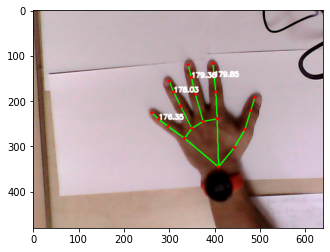

In [30]:
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
def draw_finger_angles(image, results, joint_list,lst):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        tmp=0
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
            lst[tmp]=round(angle, 2)
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            tmp+=1
    return image

In [32]:
def get_label1b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label2b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label3b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label4b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_TIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output
                    

In [33]:
def get_label_index(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output
def get_label_middle(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label_ring(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label_pinky(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_TIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [35]:
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.9,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            if lst[0]<175.0:
                if ltr[mindex1]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex1]
                sleep(0.99)
            elif lst[1]<170.0:
                if ltr[mindex2]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex2]
                sleep(0.99)
            elif lst[2]<170.0:
                if ltr[mindex3]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex3]
                sleep(0.99)
            elif lst[3]<170:
                if ltr[mindex4]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex4]
                sleep(0.99)
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# Pattern strokes mapping

In [37]:
flag1=-1
flag2=-1
flag3=-1
flag4=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            if lst[0]<175.0:
                flag1=0
            elif lst[1]<170.0:
                flag2=0
            elif lst[2]<170.0:
                flag3=0
            elif lst[3]<170.0:
                flag4=0
            
            if lst[0]>175.0 and flag1==0:
                if ltr[mindex1]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex1]
                sleep(0.99)
                flag1=-1
            
                
            elif lst[1]>170.0 and flag2==0:
                if ltr[mindex2]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex2]
                sleep(0.99)
                flag2=-1
                
            elif lst[2]>170.0 and flag3==0:
                if ltr[mindex3]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex3]
                sleep(0.99)
                flag3=-1
                
            elif lst[3]>170.0 and flag4==0:
                if ltr[mindex4]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex4]
                sleep(0.99)
                flag4=-1
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# DTW

In [36]:
my_dict = {}
for i in range(30):
    my_dict[i] = [0] * 30

In [46]:
# Initialize the array to store the angle values
idxpattern = [0] * 1

In [47]:
count=0
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            
            # Add the angle to the end of the array
            idxpattern.append(lst[0])
            count+=1
            if count%100==0:
                sleep(1)
            # If the array has more than 100 elements, remove the first element
            #if len(idxpattern) > 100:
                #idxpattern.pop(0)
            
            
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

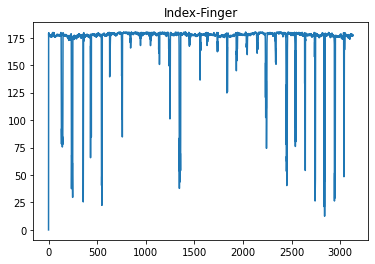

In [48]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(idxpattern))]
plt.plot(t1, idxpattern)#X-Y axis
plt.title("Index-Finger")
plt.show()

In [50]:
tempo=idxpattern.copy()

### 1

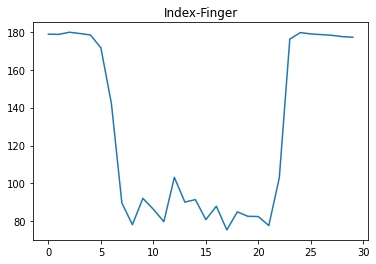

In [123]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[125:155]))]
plt.plot(t1, tempo[125:155])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [124]:
my_dict[0]=tempo[125:155]

### 2

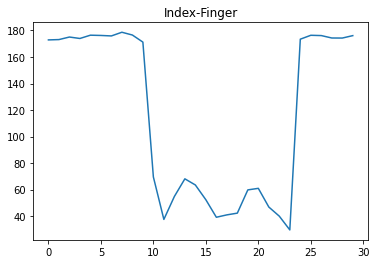

In [125]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[225:255]))]
plt.plot(t1, tempo[225:255])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [126]:
my_dict[1]=tempo[225:255]

### 3

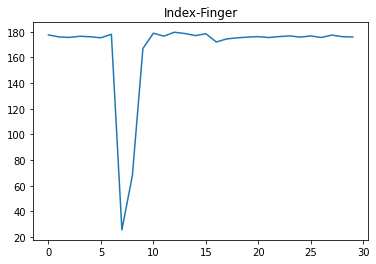

In [127]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[350:380]))]
plt.plot(t1, tempo[350:380])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [128]:
my_dict[2]=tempo[350:380]

### 4

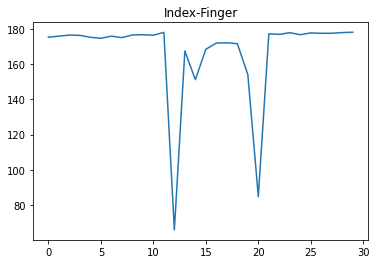

In [129]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[420:450]))]
plt.plot(t1, tempo[420:450])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [130]:
my_dict[3]=tempo[420:450]

### 5

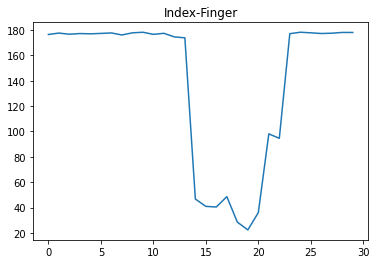

In [131]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[530:560]))]
plt.plot(t1, tempo[530:560])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [132]:
my_dict[4]=tempo[530:560]

### 6

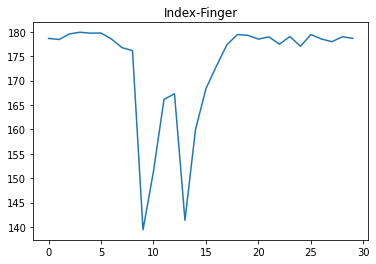

In [133]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[620:650]))]
plt.plot(t1, tempo[620:650])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [134]:
my_dict[5]=tempo[620:650]

### 7

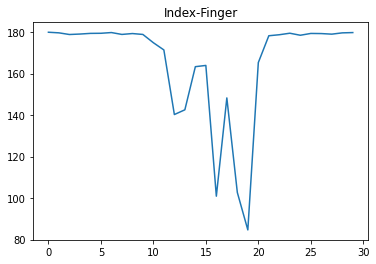

In [135]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[740:770]))]
plt.plot(t1, tempo[740:770])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [136]:
my_dict[6]=tempo[740:770]

### 8

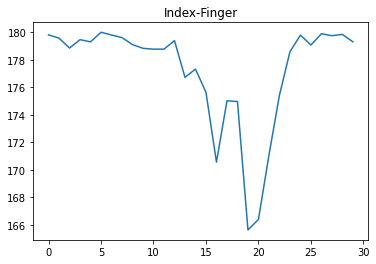

In [137]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[825:855]))]
plt.plot(t1, tempo[825:855])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [138]:
my_dict[7]=tempo[825:855]

### 9

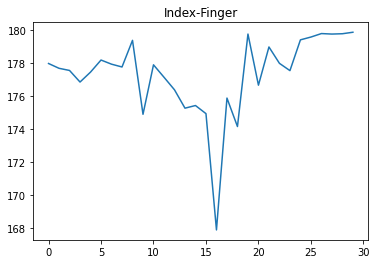

In [139]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[930:960]))]
plt.plot(t1, tempo[930:960])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [140]:
my_dict[8]=tempo[930:960]

### 10

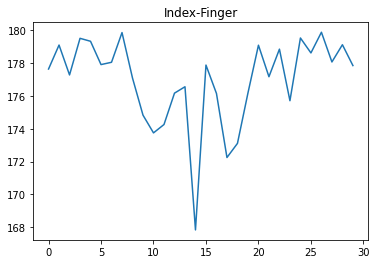

In [141]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[1035:1065]))]
plt.plot(t1, tempo[1035:1065])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [142]:
my_dict[9]=tempo[1035:1065]

### 11

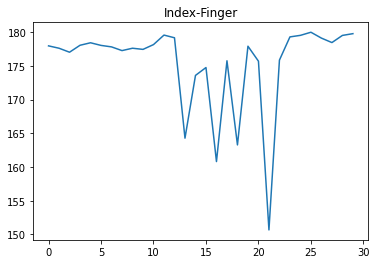

In [143]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[1120:1150]))]
plt.plot(t1, tempo[1120:1150])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [144]:
my_dict[10]=tempo[1120:1150]

### 12

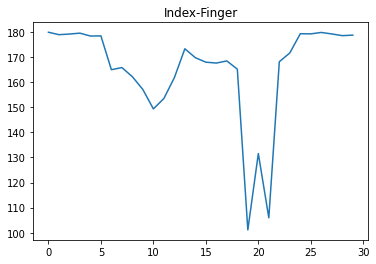

In [145]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[1230:1260]))]
plt.plot(t1, tempo[1230:1260])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [146]:
my_dict[11]=tempo[1230:1260]

### 13

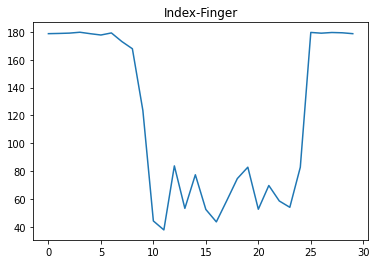

In [147]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[1335:1365]))]
plt.plot(t1, tempo[1335:1365])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [148]:
my_dict[12]=tempo[1335:1365]

### 14

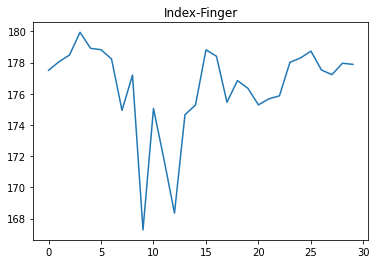

In [149]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[1440:1470]))]
plt.plot(t1, tempo[1440:1470])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [150]:
my_dict[13]=tempo[1440:1470]

### 15

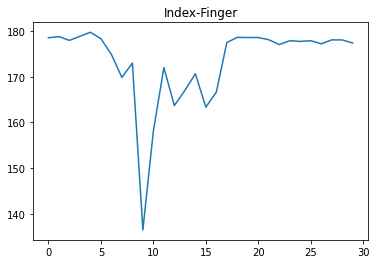

In [151]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[1550:1580]))]
plt.plot(t1, tempo[1550:1580])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [152]:
my_dict[14]=tempo[1550:1580]

### 16

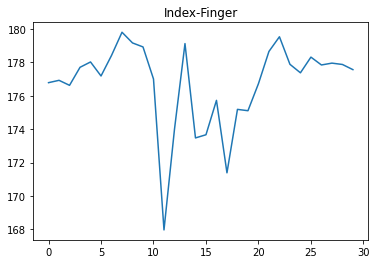

In [153]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[1620:1650]))]
plt.plot(t1, tempo[1620:1650])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [154]:
my_dict[15]=tempo[1620:1650]

### 17

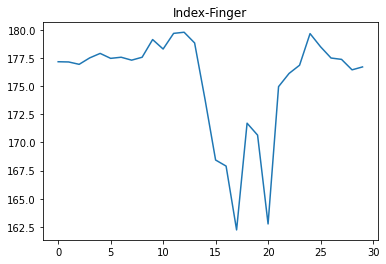

In [155]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[1720:1750]))]
plt.plot(t1, tempo[1720:1750])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [156]:
my_dict[16]=tempo[1720:1750]

### 18

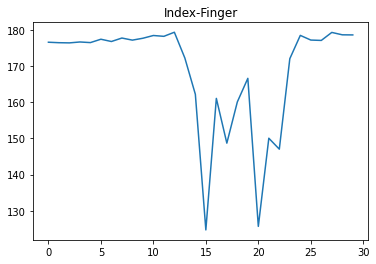

In [157]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[1820:1850]))]
plt.plot(t1, tempo[1820:1850])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [158]:
my_dict[17]=tempo[1820:1850]

### 19

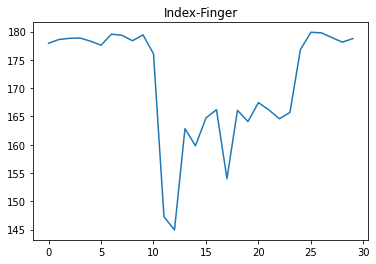

In [159]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[1920:1950]))]
plt.plot(t1, tempo[1920:1950])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [160]:
my_dict[18]=tempo[1920:1950]

### 20

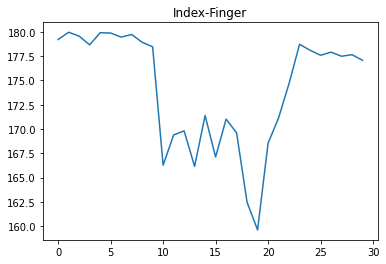

In [161]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[2025:2055]))]
plt.plot(t1, tempo[2025:2055])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [162]:
my_dict[19]=tempo[2025:2055]

### 21

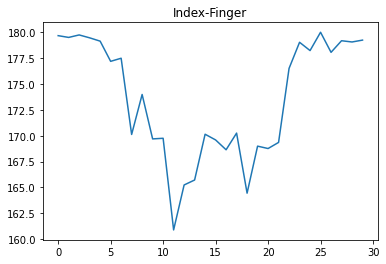

In [163]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[2135:2165]))]
plt.plot(t1, tempo[2135:2165])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [164]:
my_dict[20]=tempo[2135:2165]

### 22

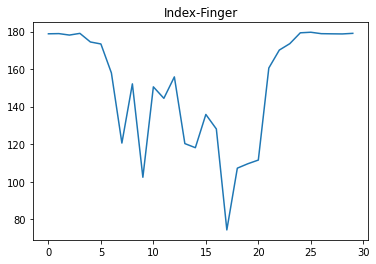

In [165]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[2225:2255]))]
plt.plot(t1, tempo[2225:2255])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [166]:
my_dict[21]=tempo[2225:2255]

### 23

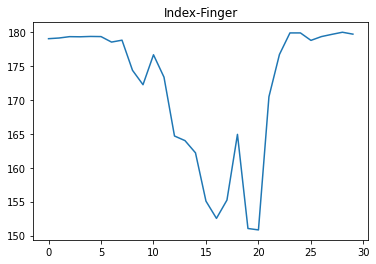

In [167]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[2320:2350]))]
plt.plot(t1, tempo[2320:2350])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [168]:
my_dict[22]=tempo[2320:2350]

### 24

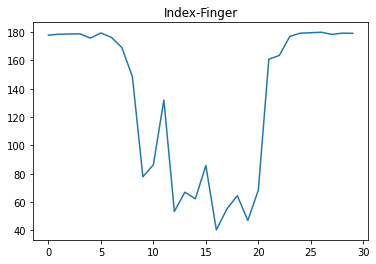

In [169]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[2435:2465]))]
plt.plot(t1, tempo[2435:2465])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [170]:
my_dict[23]=tempo[2435:2465]

### 25

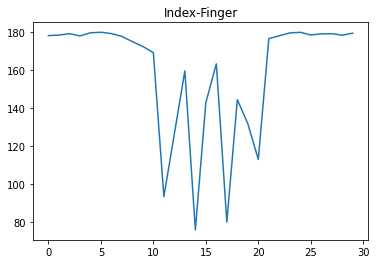

In [171]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[2525:2555]))]
plt.plot(t1, tempo[2525:2555])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [172]:
my_dict[24]=tempo[2525:2555]

### 26

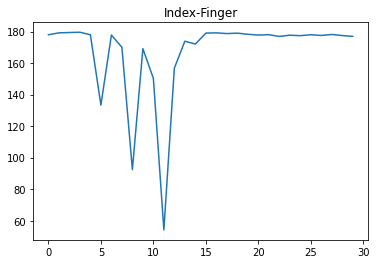

In [173]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[2630:2660]))]
plt.plot(t1, tempo[2630:2660])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [174]:
my_dict[25]=tempo[2630:2660]

### 27

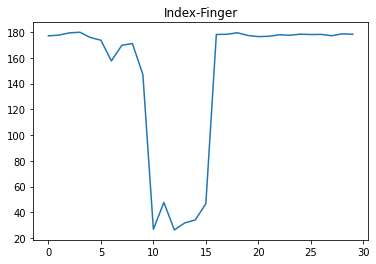

In [175]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[2730:2760]))]
plt.plot(t1, tempo[2730:2760])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [176]:
my_dict[26]=tempo[2730:2760]

### 28

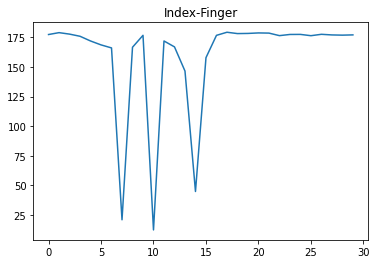

In [177]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[2830:2860]))]
plt.plot(t1, tempo[2830:2860])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [178]:
my_dict[27]=tempo[2830:2860]

### 29

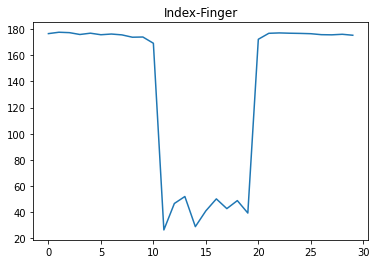

In [179]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[2930:2960]))]
plt.plot(t1, tempo[2930:2960])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [180]:
my_dict[28]=tempo[2930:2960]

### 30

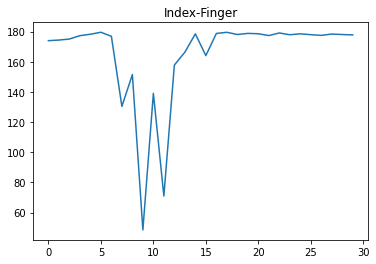

In [181]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(tempo[3030:3060]))]
plt.plot(t1, tempo[3030:3060])#X-Y axis
plt.title("Index-Finger")
plt.show()

In [182]:
my_dict[29]=tempo[3030:3060]

In [183]:
my_dict

{0: [178.75,
  178.65,
  179.77,
  179.1,
  178.34,
  171.54,
  142.24,
  89.7,
  78.29,
  92.18,
  86.41,
  79.88,
  103.25,
  90.18,
  91.51,
  80.96,
  88.01,
  75.52,
  85.04,
  82.71,
  82.57,
  77.8,
  103.08,
  176.17,
  179.59,
  178.88,
  178.52,
  178.16,
  177.46,
  177.13],
 1: [172.87,
  173.12,
  175.04,
  173.95,
  176.43,
  176.23,
  175.87,
  178.65,
  176.55,
  171.22,
  69.57,
  37.56,
  54.84,
  68.15,
  63.52,
  52.39,
  39.19,
  40.97,
  42.29,
  59.81,
  60.98,
  46.89,
  39.99,
  29.64,
  173.42,
  176.36,
  176.14,
  174.31,
  174.27,
  176.1],
 2: [177.57,
  176.0,
  175.61,
  176.5,
  176.13,
  175.35,
  178.07,
  25.51,
  67.94,
  166.94,
  178.89,
  176.62,
  179.65,
  178.65,
  177.04,
  178.49,
  172.05,
  174.47,
  175.29,
  175.86,
  176.23,
  175.53,
  176.29,
  176.78,
  175.86,
  176.77,
  175.56,
  177.43,
  176.19,
  175.95],
 3: [175.46,
  176.04,
  176.66,
  176.48,
  175.4,
  174.82,
  176.04,
  175.21,
  176.72,
  176.86,
  176.57,
  178.2,
  6

In [186]:
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [197]:
# Initialize the array to store the angle values
angle_array = [0] * 30
ptrn=[]

cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            
            # Add the angle to the end of the array
            angle_array.append(lst[0])
            ptrn.append(lst[0])
            # If the array has more than 100 elements, remove the first element
            if len(angle_array) > 30:
                angle_array.pop(0)
            #print(dtw(my_dict[0], angle_array, 3)[-1][-1])
            if dtw(my_dict[0], angle_array, 3)[-1][-1]<500 or dtw(my_dict[1], angle_array, 3)[-1][-1]<500 or dtw(my_dict[2], angle_array, 3)[-1][-1]<500 or dtw(my_dict[3], angle_array, 3)[-1][-1]<500:
                if ltr[mindex1]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex1]
                for i in range(30):
                    angle_array[i] = 178
                sleep(0.99)
                
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# BREAK: prev code

In [65]:
# Initialize the array to store the angle values
idxpattern = [0] * 100

In [66]:
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            
            # Add the angle to the end of the array
            idxpattern.append(lst[0])

            # If the array has more than 100 elements, remove the first element
            if len(idxpattern) > 100:
                idxpattern.pop(0)
            
            
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

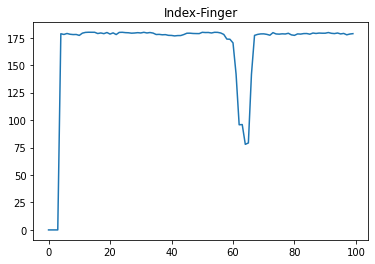

In [67]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(100)]
plt.plot(t1, idxpattern)#X-Y axis
plt.title("Index-Finger")
plt.show()

In [68]:
idxpattern2=idxpattern[45:75]

## Dual Code

## Run from here

In [74]:
idxpattern2=[178.29,
 178.75,
 178.68,
 178.49,
 178.89,
 177.9,
 178.35,
 178.66,
 178.9,
 179.8,
 177.51,
 168.14,
 161.28,
 174.65,
 174.75,
 173.09,
 177.55,
 176.97,
 179.32,
 179.99,
 178.0,
 178.4,
 177.76,
 179.91,
 178.76,
 178.97,
 178.16,
 178.82,
 178.37,
 178.7]

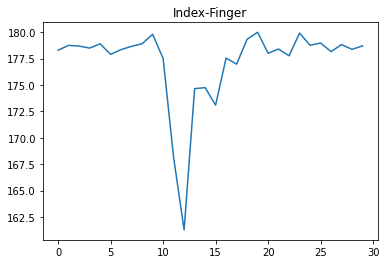

In [87]:
import matplotlib.pyplot as plt
# plota line graph
t1=[i for i in range(30)]
plt.plot(t1, idxpattern2)#X-Y axis
plt.title("Index-Finger")
plt.show()
#plt.savefig('dtwref.jpg')

In [76]:
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [88]:
# Initialize the array to store the angle values
angle_array = [0] * 30
ptrn=[]

cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            
            # Add the angle to the end of the array
            angle_array.append(lst[0])
            ptrn.append(lst[0])
            # If the array has more than 100 elements, remove the first element
            if len(angle_array) > 30:
                angle_array.pop(0)
            
            if dtw(idxpattern2, angle_array, 3)[-1][-1]<45:
                if ltr[mindex1]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex1]
                for i in range(30):
                    angle_array[i] = 178
                sleep(0.99)
                
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

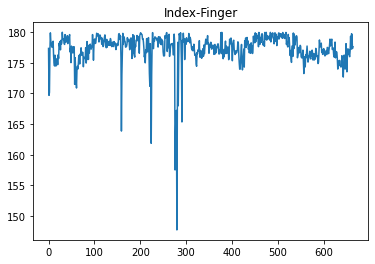

In [89]:
import matplotlib.pyplot as plt
# plota line graph
t9=[i for i in range(len(ptrn))]
plt.plot(t9, ptrn)#X-Y axis
plt.title("Index-Finger")
plt.show()
#plt.savefig('dtwip.jpg')

# With notepad code:

In [34]:
!pip install pywinauto

You should consider upgrading via the 'c:\users\dhruv\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [51]:
import time
from pywinauto.application import Application
from pywinauto.keyboard import SendKeys

cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]

app = Application().start("notepad.exe")
# Wait for the Notepad window to appear
#while not app.windows():
    #time.sleep(1)
# Get the Notepad window
notepad_window = app.top_window()


with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.9,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            if lst[0]<100.0:
                if ltr[mindex1]=="*":
                    stree=stree[0:-1]
                    SendKeys("{BACKSPACE}")
                else:
                    stree=stree+ltr[mindex1]
                    notepad_window.type_keys(str(ltr[mindex1]), with_spaces=True)
                sleep(0.99)
            elif lst[1]<90.0:
                if ltr[mindex2]=="*":
                    stree=stree[0:-1]
                    SendKeys("{BACKSPACE}")
                else:
                    stree=stree+ltr[mindex2]
                    notepad_window.type_keys(str(ltr[mindex1]), with_spaces=True)
                sleep(0.99)
            elif lst[2]<75.0:
                if ltr[mindex3]=="*":
                    stree=stree[0:-1]
                    SendKeys("{BACKSPACE}")
                else:
                    stree=stree+ltr[mindex3]
                    notepad_window.type_keys(str(ltr[mindex1]), with_spaces=True)
                sleep(0.99)
            elif lst[3]<100.0:
                if ltr[mindex4]=="*":
                    stree=stree[0:-1]
                    SendKeys("{BACKSPACE}")
                else:
                    stree=stree+ltr[mindex4]
                    notepad_window.type_keys(str(ltr[mindex1]), with_spaces=True)
                sleep(0.99)
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# Save the file
#notepad_window.menu_select("File -> Save")
#save_dialog = app.window(title="Save As")
#save_dialog.SaveAs.edit.SetText("test.txt")
#save_dialog.SaveAs.Save.Click()

# Close the window
#notepad_window.close()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [37]:
"""
import time
from pywinauto.application import Application
from pywinauto.keyboard import SendKeys

app = Application().start("notepad.exe")

# Wait for the Notepad window to appear
while not app.windows():
    time.sleep(1)

# Get the Notepad window
notepad_window = app.top_window()

# Type some text into Notepad
#dt=input("What do you want to type?")
#notepad_window.type_keys(dt, with_spaces=True)
notepad_window.type_keys("Hello there", with_spaces=True)
time.sleep(2)
SendKeys("{BACKSPACE}")
#notepad_window.type_keys("How are you!", with_spaces=True)
# Save the file
notepad_window.menu_select("File -> Save")
save_dialog = app.window(title="Save As")
save_dialog.SaveAs.edit.SetText("test.txt")
save_dialog.SaveAs.Save.Click()

# Close the window
notepad_window.close()
"""

'\nimport time\nfrom pywinauto.application import Application\nfrom pywinauto.keyboard import SendKeys\n\napp = Application().start("notepad.exe")\n\n# Wait for the Notepad window to appear\nwhile not app.windows():\n    time.sleep(1)\n\n# Get the Notepad window\nnotepad_window = app.top_window()\n\n# Type some text into Notepad\n#dt=input("What do you want to type?")\n#notepad_window.type_keys(dt, with_spaces=True)\nnotepad_window.type_keys("Hello there", with_spaces=True)\ntime.sleep(2)\nSendKeys("{BACKSPACE}")\n#notepad_window.type_keys("How are you!", with_spaces=True)\n# Save the file\nnotepad_window.menu_select("File -> Save")\nsave_dialog = app.window(title="Save As")\nsave_dialog.SaveAs.edit.SetText("test.txt")\nsave_dialog.SaveAs.Save.Click()\n\n# Close the window\nnotepad_window.close()\n'

# Graph plotting for  angles

In [37]:
joint_list = [[8,6,5], [12,10,9], [16,14,13], [20,18,17],[4,3,2]]

In [38]:
def draw_finger_angles(image, results, joint_list,lst):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        tmp=0
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
            lst[tmp]=round(angle, 2)
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            tmp+=1
    return image

# Threshold angles calculation:

In [132]:
import cv2

# Open a video capture device
cap = cv2.VideoCapture(0)

# Create a window to display the video
cv2.namedWindow("Video", cv2.WINDOW_NORMAL)

while True:
    # Capture a frame
    ret, frame = cap.read()

    # Get the frames per second (fps) of the video stream
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Draw the fps on the video frame
    fps_text = f"FPS: {int(fps)}"
    cv2.putText(frame, fps_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the video frame in the window
    cv2.imshow("Video", frame)

    # Check for the "q" key to quit the program
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the video capture device and close the window
cap.release()
cv2.destroyAllWindows()


In [68]:
def get_label1b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label2b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label3b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label4b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_PIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label5b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.THUMB_MCP].x,hand.landmark[mp_hands.HandLandmark.THUMB_MCP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
data = {
    "t":[],
    "f1": [],
    "f2": [],
    "f3": [],
    "f4": [],
    "f5": []
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
#df.loc[len(df.index)] = [20, 89, 93,14] 
print(df)

Empty DataFrame
Columns: [t, f1, f2, f3, f4, f5]
Index: []


In [70]:
cap = cv2.VideoCapture(1)
lst=[180.00,180.00,180.00,180.00,180.00]
fingerno=["index","middle","ring","little","thumb"]
iterno=0
tim=0
with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.7,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex1=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex2=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex3=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex4=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label5b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex5=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            df.loc[len(df.index)] = [tim,lst[0],lst[1],lst[2],lst[3],lst[4]]   
            tim+=0.2
            #sleep(0.20)
                
        cv2.putText(image,fingerno[iterno]+"finger",(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        if tim>50:
            sleep(1.50)
            tim=0
            if iterno==4:
                iterno=0
            else:
                iterno+=1
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [71]:
print(df) #back to 0 at every 250

         t      f1      f2      f3      f4     f5
0      0.0  176.70  176.00  177.31  174.65  180.0
1      0.2  156.28  149.53  153.98  172.99  180.0
2      0.4  164.47  153.68  148.17  151.28  180.0
3      0.6  179.79  179.50  178.07  177.62  180.0
4      0.8  179.54  178.53  178.58  178.52  180.0
...    ...     ...     ...     ...     ...    ...
1245  49.0  175.80  178.19  179.80  178.45  180.0
1246  49.2  174.88  177.64  179.38  179.62  180.0
1247  49.4  175.06  177.32  179.58  179.29  180.0
1248  49.6  176.18  177.47  179.88  179.63  180.0
1249  49.8  175.75  177.14  179.75  179.99  180.0

[1250 rows x 6 columns]


# Importing neccesary library for visualization:

In [72]:
import matplotlib.pyplot as plt

# Index-Finger angle graph:

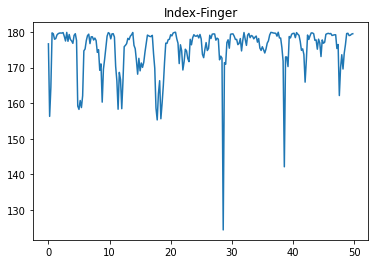

In [73]:
# plot a line graph
plt.plot(df.iloc[0:250]["t"], df.iloc[0:250]["f1"])#X-Y axis
#plt.show()
plt.title("Index-Finger")
plt.savefig('index-finger.jpg')

# Middle-Finger angle graph:

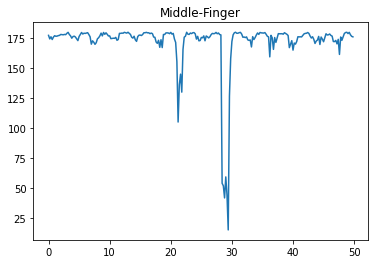

In [74]:
# plot a line graph
plt.plot(df.iloc[250:500]["t"], df.iloc[250:500]["f2"])#X-Y axis
#plt.show()
plt.title("Middle-Finger")
plt.savefig('middle-finger.jpg')

# Ring-Finger angle graph:

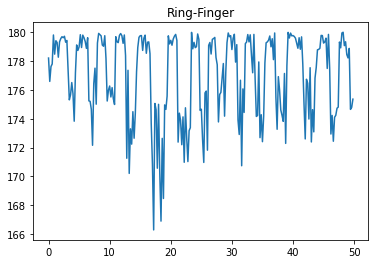

In [75]:
# plot a line graph
plt.plot(df.iloc[500:750]["t"], df.iloc[500:750]["f3"])#X-Y axis
#plt.show()
plt.title("Ring-Finger")
plt.savefig('ring-finger.jpg')

# Little-Finger angle graph:

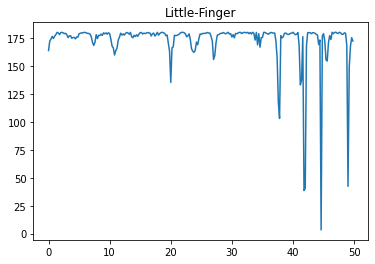

In [76]:
# plot a line graph
plt.plot(df.iloc[750:1000]["t"], df.iloc[750:1000]["f4"])#X-Y axis
#plt.show()
plt.title("Little-Finger")
plt.savefig('little-finger.jpg')

# Thumb angle graph:

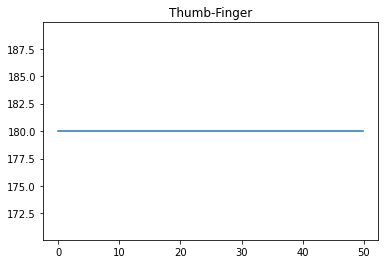

In [77]:
# plot a line graph
plt.plot(df.iloc[1000:1250]["t"], df.iloc[1000:1250]["f5"])#X-Y axis
#plt.show()
plt.title("Thumb-Finger")
plt.savefig('thumb-finger.jpg')

# All-Fingers angle graph:

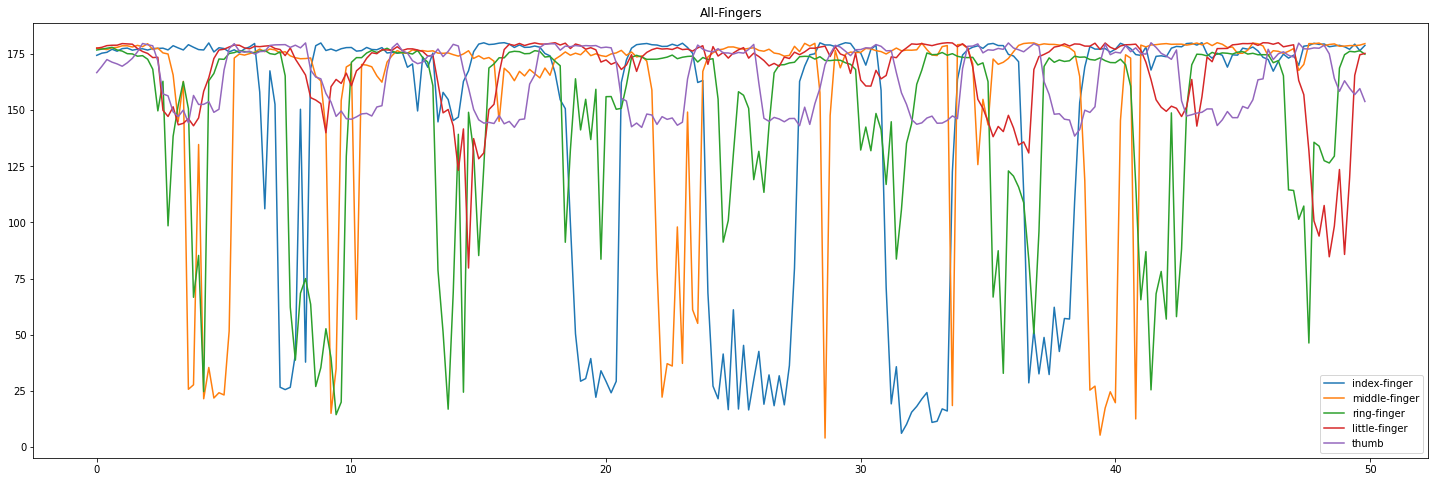

In [49]:
# plot a line graph
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)

plt.plot(df.iloc[0:250]["t"], df.iloc[0:250]["f1"])#X-Y axis
plt.plot(df.iloc[250:500]["t"], df.iloc[250:500]["f2"])#X-Y axis
plt.plot(df.iloc[500:750]["t"], df.iloc[500:750]["f3"])#X-Y axis
plt.plot(df.iloc[750:1000]["t"], df.iloc[750:1000]["f4"])#X-Y axis
plt.plot(df.iloc[1000:1250]["t"], df.iloc[1000:1250]["f5"])#X-Y axis
plt.legend(["index-finger","middle-finger","ring-finger","little-finger","thumb"], loc ="lower right")

#plt.show()
plt.title("All-Fingers")
plt.savefig('all-fingers.jpg')

# Pattern movement plotting:

In [43]:
joint_list = [[8,7,6], [12,11,10], [16,15,14], [20,19,18],[4,3,2]]

In [44]:
def draw_finger_angles(image, results, joint_list,lst):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        tmp=0
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
            lst[tmp]=round(angle, 2)
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            tmp+=1
    return image

# Threshold angles calculation:

In [45]:
def get_label1b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label2b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label3b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label4b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_PIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label5b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.THUMB_MCP].x,hand.landmark[mp_hands.HandLandmark.THUMB_MCP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
data = {
    "t":[],
    "f1": [],
    "f2": [],
    "f3": [],
    "f4": [],
    "f5": []
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
#df.loc[len(df.index)] = [20, 89, 93,14] 
print(df)

Empty DataFrame
Columns: [t, f1, f2, f3, f4, f5]
Index: []


In [47]:
cap = cv2.VideoCapture(1)
lst=[180.00,180.00,180.00,180.00,180.00]
fingerno=["index","middle","ring","little","thumb"]
iterno=0
tim=0
with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.7,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex1=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex2=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex3=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex4=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label5b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex5=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            df.loc[len(df.index)] = [tim,lst[0],lst[1],lst[2],lst[3],lst[4]]   
            tim+=0.2
            #sleep(0.20)
                
        cv2.putText(image,fingerno[iterno]+"finger",(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        if tim>100:
            sleep(1.50)
            tim=0
            if iterno==4:
                iterno=0
            else:
                iterno+=1
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [48]:
print(df) #back to 0 at every 250

        t      f1      f2      f3      f4      f5
0     0.0  178.92  179.52  177.95  179.15  169.06
1     0.2  176.50  178.18  179.06  178.85  162.17
2     0.4  176.70  177.90  179.68  178.56  159.67
3     0.6  177.24  177.13  179.30  179.69  166.12
4     0.8  177.55  177.48  179.97  179.12  165.47
...   ...     ...     ...     ...     ...     ...
2527  5.4  178.74  179.57  179.52  178.73  175.41
2528  5.6  177.43  178.49  179.74  178.48  177.65
2529  5.8  178.25  178.72  179.40  178.75  177.72
2530  6.0  179.30  178.52  177.78  178.24  175.42
2531  6.2  179.02  179.10  177.66  178.14  177.19

[2532 rows x 6 columns]


# Importing neccesary library for visualization:

In [49]:
import matplotlib.pyplot as plt

# Index-Finger angle graph:

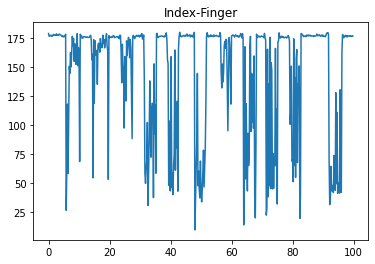

In [50]:
# plot a line graph
plt.plot(df.iloc[0:500]["t"], df.iloc[0:500]["f1"])#X-Y axis
#plt.show()
plt.title("Index-Finger")
plt.savefig('index-finger.jpg')

# Middle-Finger angle graph:

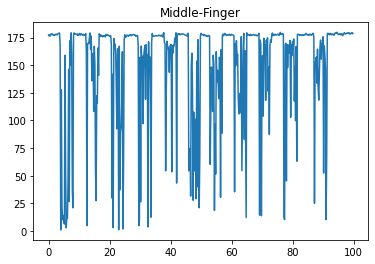

In [51]:
# plot a line graph
plt.plot(df.iloc[500:1000]["t"], df.iloc[500:1000]["f2"])#X-Y axis
#plt.show()
plt.title("Middle-Finger")
plt.savefig('middle-finger.jpg')

# Ring-Finger angle graph:

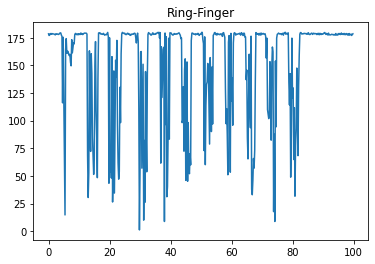

In [52]:
# plot a line graph
plt.plot(df.iloc[1000:1500]["t"], df.iloc[1000:1500]["f3"])#X-Y axis
#plt.show()
plt.title("Ring-Finger")
plt.savefig('ring-finger.jpg')

# Little-Finger angle graph:

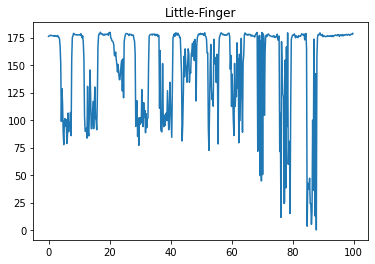

In [53]:
# plot a line graph
plt.plot(df.iloc[1500:2000]["t"], df.iloc[1500:2000]["f4"])#X-Y axis
#plt.show()
plt.title("Little-Finger")
plt.savefig('little-finger.jpg')

# Thumb angle graph:

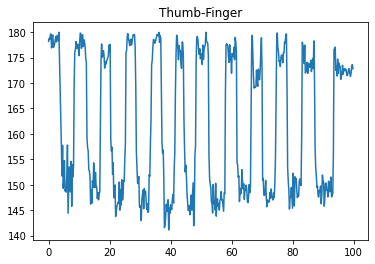

In [54]:
# plot a line graph
plt.plot(df.iloc[2000:2500]["t"], df.iloc[2000:2500]["f5"])#X-Y axis
#plt.show()
plt.title("Thumb-Finger")
plt.savefig('thumb-finger.jpg')

# All-Fingers angle graph:

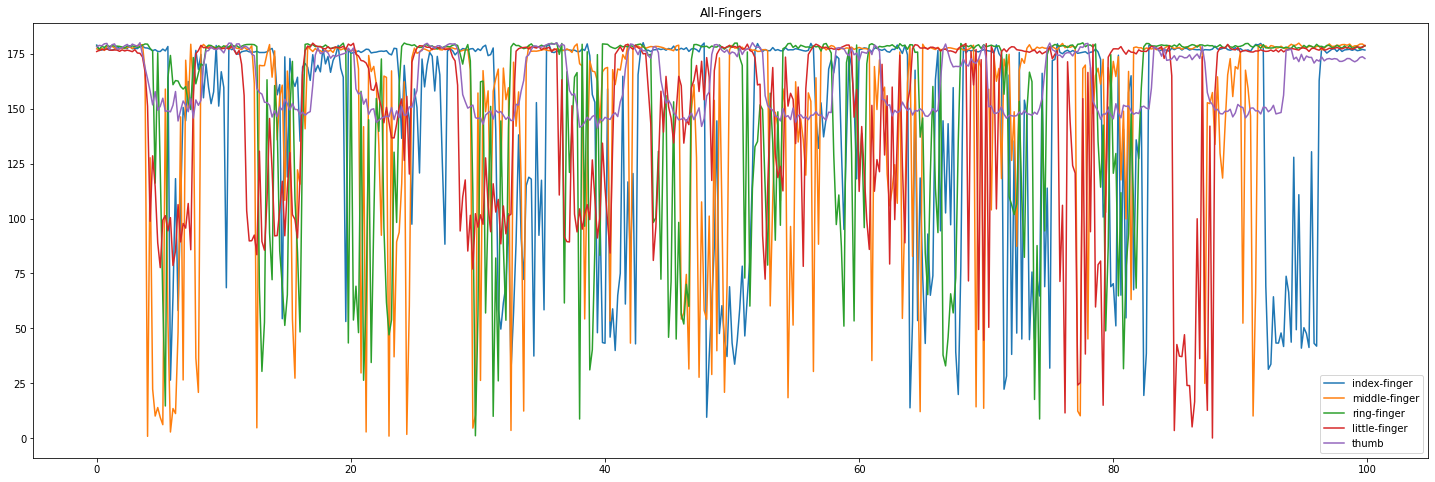

In [55]:
# plot a line graph
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)

plt.plot(df.iloc[0:500]["t"], df.iloc[0:500]["f1"])#X-Y axis
plt.plot(df.iloc[500:1000]["t"], df.iloc[500:1000]["f2"])#X-Y axis
plt.plot(df.iloc[1000:1500]["t"], df.iloc[1000:1500]["f3"])#X-Y axis
plt.plot(df.iloc[1500:2000]["t"], df.iloc[1500:2000]["f4"])#X-Y axis
plt.plot(df.iloc[2000:2500]["t"], df.iloc[2000:2500]["f5"])#X-Y axis
plt.legend(["index-finger","middle-finger","ring-finger","little-finger","thumb"], loc ="lower right")

#plt.show()
plt.title("All-Fingers")
plt.savefig('all-fingers.jpg')

# Mouse Functionalities

In [40]:
!pip install screeninfo

You should consider upgrading via the 'c:\users\dhruv\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [ ]:
import win32api
import win32con
from screeninfo import get_monitors
import cv2
import mediapipe as mp
import numpy as np

cap = cv2.VideoCapture(1)

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1)

increment = 6
left_clicked = False
right_clicked = False

prev_x, prev_y, curr_x, curr_y = 0, 0, 0, 0


def click(states):
    global left_clicked, right_clicked

    if not states[0] and states[1] and not left_clicked:
        win32api.mouse_event(win32con.MOUSEEVENTF_LEFTDOWN, 0, 0)
        win32api.mouse_event(win32con.MOUSEEVENTF_LEFTUP, 0, 0)
        left_clicked = True

    if states[0] and not states[1] and not right_clicked:
        win32api.mouse_event(win32con.MOUSEEVENTF_RIGHTDOWN, 0, 0)
        win32api.mouse_event(win32con.MOUSEEVENTF_RIGHTUP, 0, 0)
        right_clicked = True

    if states[0] or states[1]:
        left_clicked = False
        right_clicked = False


def fingers_up(positions):
    states = [False] * 4

    indices = ((6, 8), (10, 12), (14, 16), (18, 20))

    for i, f in enumerate(indices):
        if positions[f[0]].x > positions[f[1]].x:
            states[i] = True

    return states


def move_mouse(positions, i_w, i_h, states):
    if states[0] and states[1]:
        global increment, prev_x, prev_y, curr_x, curr_y
        monitor = get_monitors()[0]

        m_w = monitor.width
        m_h = monitor.height

        pos_index = positions[8].x * i_w, positions[8].y * i_h
        pos_middle = positions[12].x * i_w, positions[12].y * i_h

        pos = pos_middle
        if pos_index[0] > pos_middle[0]:
            pos = pos_index

        x = np.interp(pos[0], (100, i_w - 100), (0, m_w))
        y = np.interp(pos[1], (20, i_h - 180), (0, m_h))

        # Swap x-coordinates for left-right movement
        x = m_w - x

        curr_x = prev_x + (x - prev_x) / increment
        curr_y = prev_y + (y - prev_y) / increment

        win32api.SetCursorPos((int(curr_x), int(curr_y)))
        prev_x, prev_y = curr_x, curr_y


while True:
    success, image = cap.read()
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(imageRGB)
    h, w, temp = image.shape

    if results.multi_hand_landmarks:
        for landmarks in results.multi_hand_landmarks:
            up_fin = fingers_up(landmarks.landmark)
            #click(up_fin)
            #move_mouse(landmarks.landmark, 0.45 * w, 0.45 * h, up_fin)
            mp_drawing.draw_landmarks(image, landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.rectangle(image, (100, 20), (w - 100, h - 180), (255, 0, 255), 3)
    cv2.imshow("Real Time", cv2.flip(image, 1))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()


# Resizing keyboard automation:

In [46]:
#CODE TO KNOW COORDINATES OF MOUSE

import pyautogui
t=0
while True:
    x, y = pyautogui.position()
    position_str = 'X: ' + str(x).rjust(4) + ' Y: ' + str(y).rjust(4)
    print(position_str, end='')
    print('\b' * len(position_str), end='', flush=True)
    t+=1
    if t==100:
        break


X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    

# For +

In [1]:
#For ++
import pyautogui
import time

# Press Windows key + P
pyautogui.hotkey('winleft', 'p')
time.sleep(1)

# Click at coordinates (100, 200) #duplicate
pyautogui.click(1164, 200)
time.sleep(2)

# Click at coordinates (100, 200) #random
pyautogui.click(440, 440)
time.sleep(2)

# Click at coordinates (100, 200) #right arrow key
pyautogui.click(1349, 400)
time.sleep(2)

# Press Windows key + P
pyautogui.hotkey('winleft', 'p')
time.sleep(1)

# Click at coordinates (100, 200) #Extend
pyautogui.click(1164, 300)
time.sleep(2)

# Click at coordinates (100, 200) #random
pyautogui.click(440, 440)
time.sleep(1)

# For -

In [2]:
#For --
import pyautogui
import time

# Press Windows key + P
pyautogui.hotkey('winleft', 'p')
time.sleep(1)

# Click at coordinates (100, 200) #duplicate
pyautogui.click(1164, 200)
time.sleep(2)

# Click at coordinates (100, 200) #random
pyautogui.click(440, 440)
time.sleep(2)

# Click at coordinates (100, 200) #right arrow key
pyautogui.click(5, 400)
time.sleep(2)

# Press Windows key + P
pyautogui.hotkey('winleft', 'p')
time.sleep(1)

# Click at coordinates (100, 200) #Extend
pyautogui.click(1164, 300)
time.sleep(2)

# Click at coordinates (100, 200) #random
pyautogui.click(440, 440)
time.sleep(1)

In [4]:
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [15]:
t1=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38])
t2=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [25]:
a = np.array([178, 178, 177, 178, 178, 177, 167, 166, 165, 166, 164, 166, 167, 166, 165, 166, 166, 165, 164, 165, 166, 167, 168, 176, 177, 176, 176, 177, 178, 176, 177, 178, 178, 178, 178, 179, 178, 178])
b = np.array([177, 178, 175, 168, 167, 168, 165, 164, 165, 166, 165, 175, 178, 179, 178, 178])
dtw(a,b,3)

array([[  0.,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf],
       [ inf,   1.,   1.,   4.,  14.,  25.,  35.,  48.,  62.,  75.,  87.,
        100., 103., 103., 104., 104., 104.],
       [ inf,   2.,   1.,   4.,  14.,  25.,  35.,  48.,  62.,  75.,  87.,
        100., 103., 103., 104., 104., 104.],
       [ inf,   2.,   2.,   3.,  12.,  22.,  31.,  43.,  56.,  68.,  79.,
         91.,  93.,  94.,  96.,  97.,  98.],
       [ inf,   3.,   2.,   5.,  13.,  23.,  32.,  44.,  57.,  69.,  80.,
         92.,  94.,  93.,  94.,  94.,  94.],
       [ inf,   4.,   2.,   5.,  15.,  24.,  33.,  45.,  58.,  70.,  81.,
         93.,  95.,  93.,  94.,  94.,  94.],
       [ inf,   4.,   3.,   4.,  13.,  23.,  32.,  44.,  57.,  69.,  80.,
         92.,  94.,  94.,  95.,  95.,  95.],
       [ inf,  14.,  14.,  11.,   5.,   5.,   6.,   8.,  11.,  13.,  14.,
         16.,  24.,  35.,  47.,  58.,  69.],
       [ inf,  25.,  26.,  20.,   7.,   6.,   7.

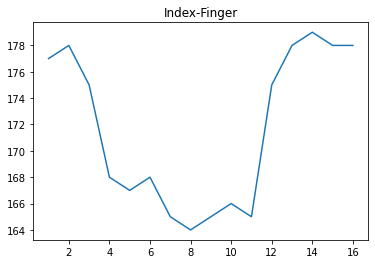

In [26]:
import matplotlib.pyplot as plt
# plot a line graph
plt.plot(t2, b)#X-Y axis
plt.title("Index-Finger")
plt.show()

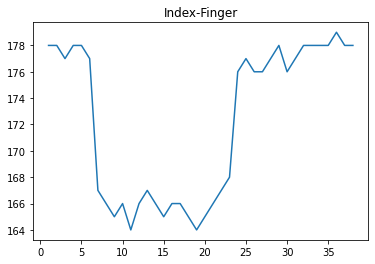

In [27]:
import matplotlib.pyplot as plt
# plot a line graph
plt.plot(t1, a)#X-Y axis
plt.title("Index-Finger")
plt.show()